# DNMT3A Subgroup Relative Error Plots for Convergence
***
### Runs the DNMT3A subgroup simulation. Then it calculates the apoptosis, proliferation, differentiation, and network scores to create the relative error plots for each example 

### Importing the BMatrix and BooleanNetwork code

In [8]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# import booleanNetwork module from ./src
import sys
sys.path.append('C:/Users/15167/OneDrive/Documents/ISB/AML-DT-BNM/jupyter_notebook/Python/BooleanNetwork/')
import booleanNetwork as bn
import BMatrix 

### Creating the variables for the simulation + calculation

In [9]:
sim_equations_file = 'C:/Users/15167/OneDrive/Documents/ISB/AML-DT-BNM/BN_equations/dnmt3a_equations.txt' #does not have the equations at the end

equations = BMatrix.get_equations(sim_equations_file)
gene_dict = BMatrix.get_gene_dict(equations)
upstream_genes = BMatrix.get_upstream_genes(equations)

connectivity_matrix = BMatrix.get_connectivity_matrix(equations,upstream_genes,gene_dict)
connectivity_matrix = np.array(connectivity_matrix)
#print(connectivity_matrix)

truth_table = BMatrix.get_truth_table(equations, upstream_genes)
truth_table = np.array(truth_table)
#print(truth_table)

ngenes= len(equations)

x0 = np.random.randint(2, size=ngenes) #random inital state 
x0 = np.array(x0)
#print(x0)

calculating_file = 'C:/Users/15167/OneDrive/Documents/ISB/AML-DT-BNM/BN_equations/calculating_equations.txt'

cal_equations = BMatrix.get_equations(calculating_file) 
cal_upstream_genes = BMatrix.get_cal_upstream_genes(cal_equations)
cal_functions = BMatrix.get_cal_functions(cal_equations)

## Testing different amount of steps and noise with relative error

### Original (0.05 noise and 200,000 steps)

In [10]:
%%time

network = bn.BooleanNetwork( ngenes , connectivity_matrix, truth_table, x0  ) # create a Boolean network object
noise_level = 0.05 # noise
network_traj = network.update_noise ( noise_level  , 200000) # simulation with noise

CPU times: total: 21.3 s
Wall time: 21.4 s


In [11]:
%%time

cal_range = network_traj 
scores_dict, final_score = BMatrix. get_calculating_scores(network_traj, cal_functions, cal_upstream_genes, gene_dict,cal_range)

CPU times: total: 23.2 s
Wall time: 23.3 s


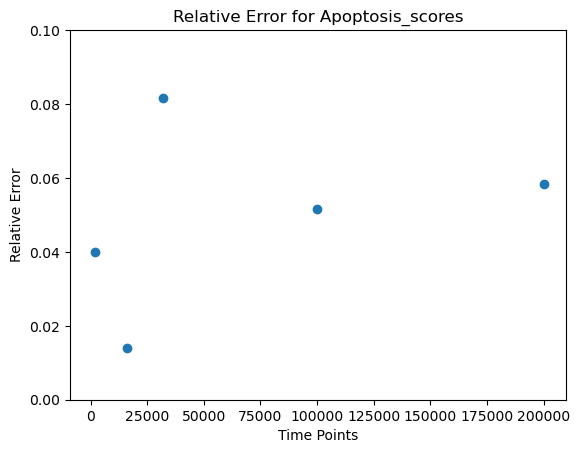

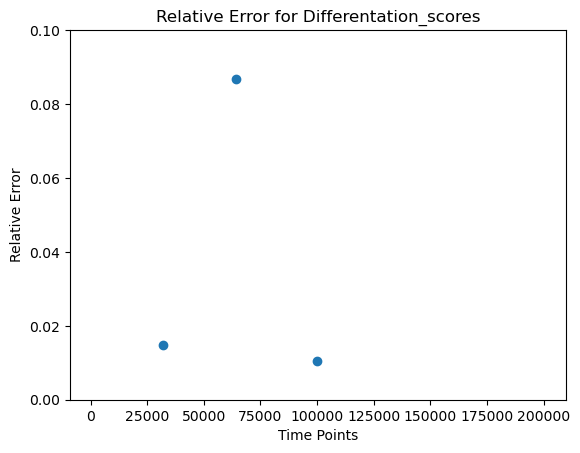

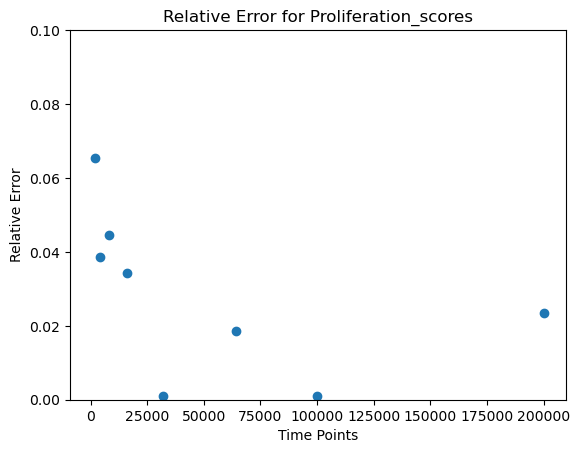

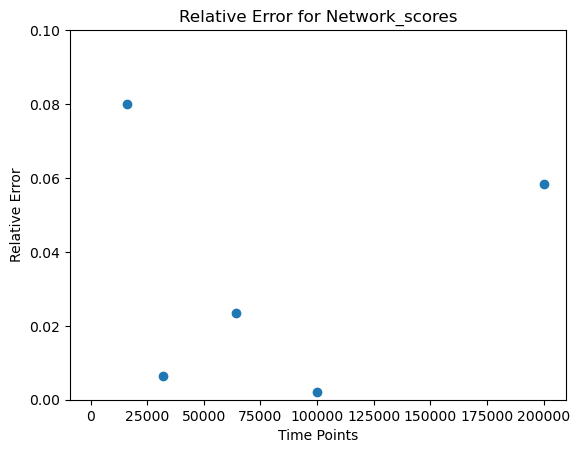

In [12]:
#getting the relative error points to see if the score converges
Apoptosis_scores = scores_dict['Apoptosis']
Differentiation_scores = scores_dict['Differentiation']
Proliferation_scores = scores_dict['Proliferation']
Network_scores = scores_dict['Network']

scores = [Apoptosis_scores, Differentiation_scores, Proliferation_scores, Network_scores]
time_points = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 100000, 200000]

plot_title = {0:'Apoptosis_scores',
              1:'Differentation_scores',
              2: 'Proliferation_scores',
              3: 'Network_scores'}

#print(plot_title)
#print(time_points)

for i in range(len(scores)): #for apop, diff, prolif, or final
    values = [] 
    relative_error = [] #reset the values
    score = scores[i]
    
    title = plot_title[i]
    #print(title)
    
    for i in range(len(time_points)): #for all time points
        point = time_points[i]
        half = (time_points[i])//2
        start_index = slice(0,half) #so for i=1, this is 1:500
        end_index = slice(half,point) #if i=1, this is 500:1000
        
        point = (abs((np.mean(score[start_index])) - (np.mean(score[end_index]))))/(np.mean(score[start_index]))
        
        values.append(point)
    
    relative_error = [np.round(value, decimals=4) for value in values]
    #print(relative_error)  
    
    plot = pd.DataFrame({'time_points': time_points, 'relative_error': relative_error})
    plt.scatter(plot['time_points'], plot['relative_error'])
    plt.xlabel('Time Points')
    plt.ylabel('Relative Error')
    plt.title('Relative Error for ' + title)
    plt.ylim(0, 0.1)
    plt.show()

### Less noise (0.01 noise and 200,000 steps)

In [13]:
%%time

network = bn.BooleanNetwork( ngenes , connectivity_matrix, truth_table, x0  ) # create a Boolean network object
noise_level = 0.01 # noise
network_traj = network.update_noise ( noise_level  , 200000) # simulation with noise

CPU times: total: 32 s
Wall time: 32.1 s


In [14]:
%%time

cal_range = network_traj 
scores_dict, final_score = BMatrix. get_calculating_scores(network_traj, cal_functions, cal_upstream_genes, gene_dict,cal_range)

CPU times: total: 22.2 s
Wall time: 22.3 s


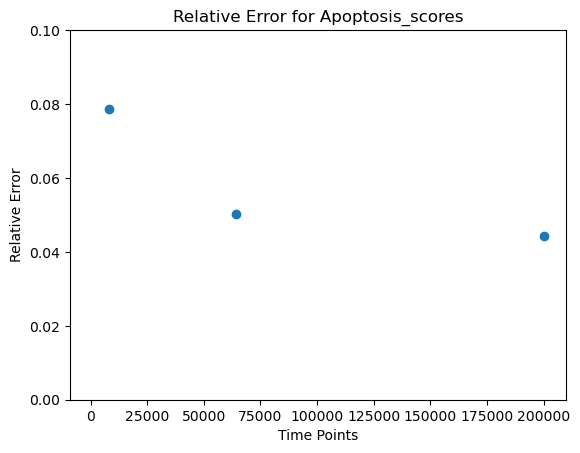

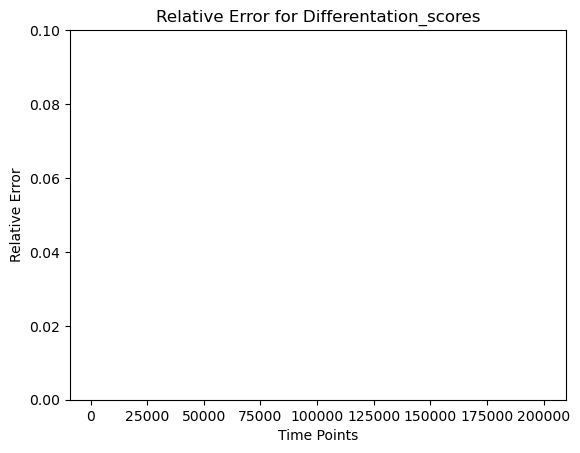

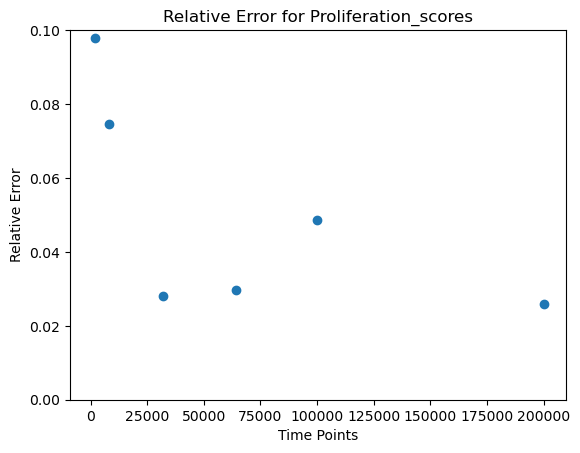

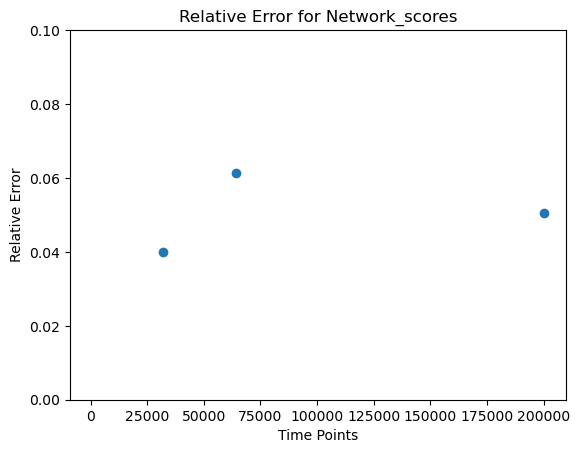

In [15]:
#getting the relative error points to see if the score converges
Apoptosis_scores = scores_dict['Apoptosis']
Differentiation_scores = scores_dict['Differentiation']
Proliferation_scores = scores_dict['Proliferation']
Network_scores = scores_dict['Network']

scores = [Apoptosis_scores, Differentiation_scores, Proliferation_scores, Network_scores]
time_points = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 100000, 200000]

plot_title = {0:'Apoptosis_scores',
              1:'Differentation_scores',
              2: 'Proliferation_scores',
              3: 'Network_scores'}

#print(plot_title)
#print(time_points)

for i in range(len(scores)): #for apop, diff, prolif, or final
    values = [] 
    relative_error = [] #reset the values
    score = scores[i]
    
    title = plot_title[i]
    #print(title)
    
    for i in range(len(time_points)): #for all time points
        point = time_points[i]
        half = (time_points[i])//2
        start_index = slice(0,half) #so for i=1, this is 1:500
        end_index = slice(half,point) #if i=1, this is 500:1000
        
        point = (abs((np.mean(score[start_index])) - (np.mean(score[end_index]))))/(np.mean(score[start_index]))
        
        values.append(point)
    
    relative_error = [np.round(value, decimals=4) for value in values]
    #print(relative_error)  
    
    plot = pd.DataFrame({'time_points': time_points, 'relative_error': relative_error})
    plt.scatter(plot['time_points'], plot['relative_error'])
    plt.xlabel('Time Points')
    plt.ylabel('Relative Error')
    plt.title('Relative Error for ' + title)
    plt.ylim(0, 0.1)
    plt.show()

### Less steps (0.05 noise and 100,000 steps)

In [16]:
%%time

network = bn.BooleanNetwork( ngenes , connectivity_matrix, truth_table, x0  ) # create a Boolean network object
noise_level = 0.05 # noise
network_traj = network.update_noise ( noise_level  , 100000) # simulation with noise

CPU times: total: 11 s
Wall time: 11 s


In [17]:
%%time

cal_range = network_traj #all of the y values (for relative error plot)
scores_dict, final_score = BMatrix. get_calculating_scores(network_traj, cal_functions, cal_upstream_genes, gene_dict,cal_range)

CPU times: total: 11.2 s
Wall time: 11.3 s


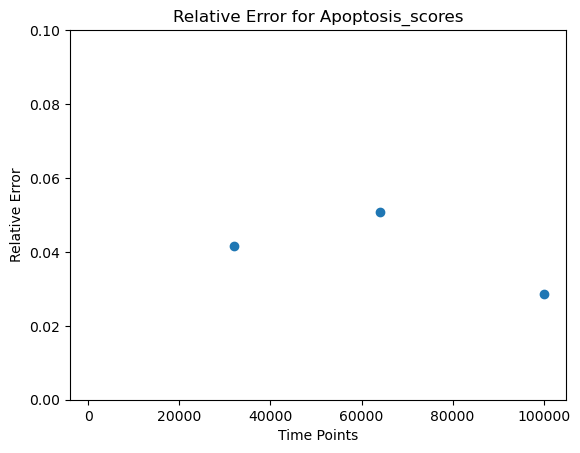

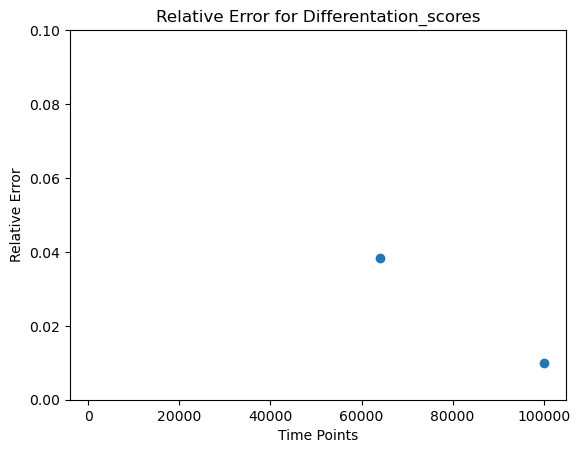

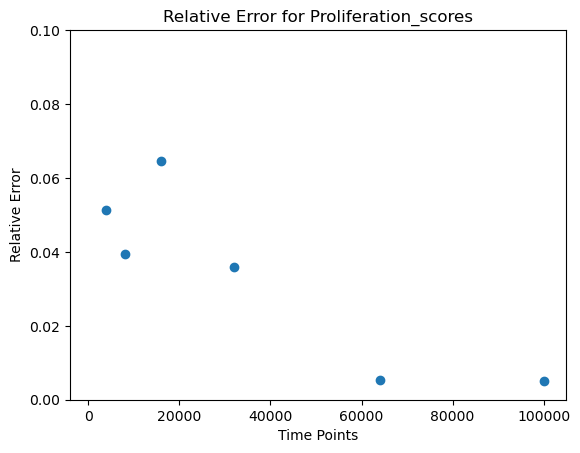

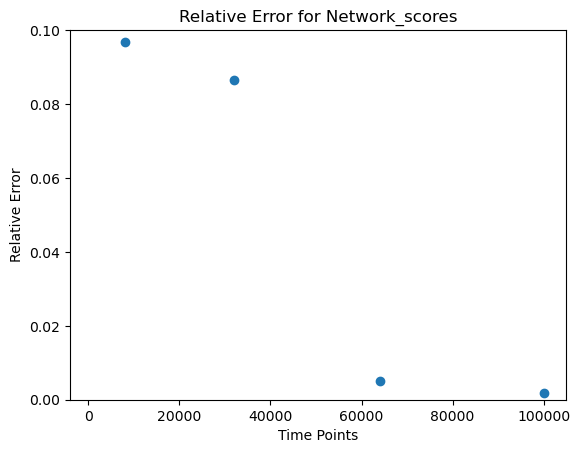

In [18]:
#getting the relative error points to see if the score converges
Apoptosis_scores = scores_dict['Apoptosis']
Differentiation_scores = scores_dict['Differentiation']
Proliferation_scores = scores_dict['Proliferation']
Network_scores = scores_dict['Network']

scores = [Apoptosis_scores, Differentiation_scores, Proliferation_scores, Network_scores]
time_points = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 100000]

plot_title = {0:'Apoptosis_scores',
              1:'Differentation_scores',
              2: 'Proliferation_scores',
              3: 'Network_scores'}

#print(plot_title)
#print(time_points)

for i in range(len(scores)): #for apop, diff, prolif, or final
    values = [] 
    relative_error = [] #reset the values
    score = scores[i]
    
    title = plot_title[i]
    #print(title)
    
    for i in range(len(time_points)): #for all time points
        point = time_points[i]
        half = (time_points[i])//2
        start_index = slice(0,half) #so for i=1, this is 1:500
        end_index = slice(half,point) #if i=1, this is 500:1000
        
        point = (abs((np.mean(score[start_index])) - (np.mean(score[end_index]))))/(np.mean(score[start_index]))
        
        values.append(point)
    
    relative_error = [np.round(value, decimals=4) for value in values]
    #print(relative_error)  
    
    plot = pd.DataFrame({'time_points': time_points, 'relative_error': relative_error})
    plt.scatter(plot['time_points'], plot['relative_error'])
    plt.xlabel('Time Points')
    plt.ylabel('Relative Error')
    plt.title('Relative Error for ' + title)
    plt.ylim(0, 0.1)
    plt.show()

### Less of both (0.01 noise and 100,000 steps)

In [19]:
%%time

network = bn.BooleanNetwork( ngenes , connectivity_matrix, truth_table, x0  ) # create a Boolean network object
noise_level = 0.01 # noise
network_traj = network.update_noise ( noise_level  , 100000) # simulation with noise

CPU times: total: 15.9 s
Wall time: 15.8 s


In [20]:
%%time

cal_range = network_traj #all of the y values (for relative error plot)
scores_dict, final_score = BMatrix. get_calculating_scores(network_traj, cal_functions, cal_upstream_genes, gene_dict,cal_range)

CPU times: total: 11.3 s
Wall time: 11.3 s


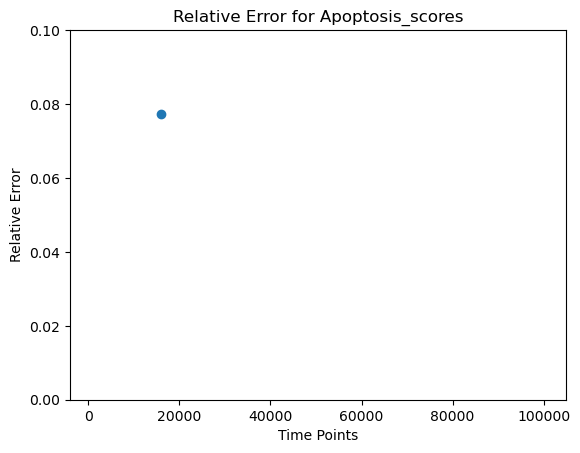

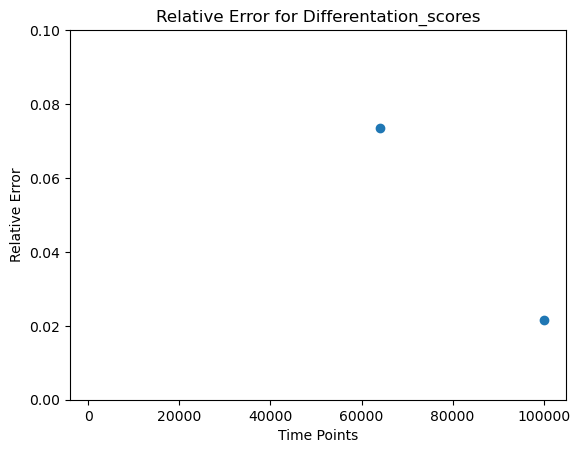

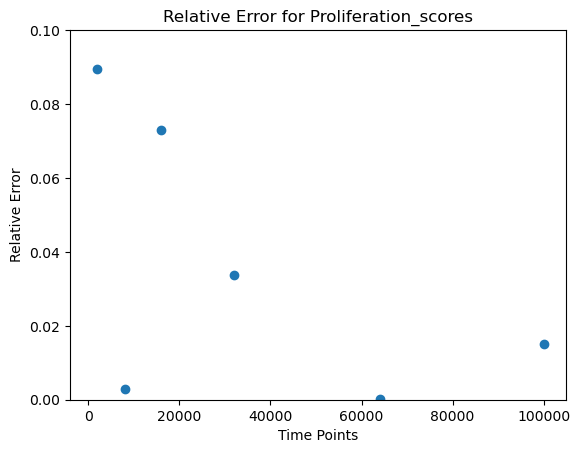

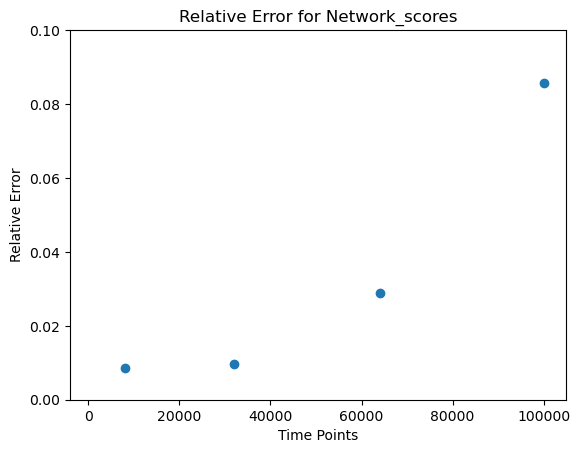

In [21]:
#getting the relative error points to see if the score converges
Apoptosis_scores = scores_dict['Apoptosis']
Differentiation_scores = scores_dict['Differentiation']
Proliferation_scores = scores_dict['Proliferation']
Network_scores = scores_dict['Network']

scores = [Apoptosis_scores, Differentiation_scores, Proliferation_scores, Network_scores]
time_points = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 100000]

plot_title = {0:'Apoptosis_scores',
              1:'Differentation_scores',
              2: 'Proliferation_scores',
              3: 'Network_scores'}

#print(plot_title)
#print(time_points)

for i in range(len(scores)): #for apop, diff, prolif, or final
    values = [] 
    relative_error = [] #reset the values
    score = scores[i]
    
    title = plot_title[i]
    #print(title)
    
    for i in range(len(time_points)): #for all time points
        point = time_points[i]
        half = (time_points[i])//2
        start_index = slice(0,half) #so for i=1, this is 1:500
        end_index = slice(half,point) #if i=1, this is 500:1000
        
        point = (abs((np.mean(score[start_index])) - (np.mean(score[end_index]))))/(np.mean(score[start_index]))
        
        values.append(point)
    
    relative_error = [np.round(value, decimals=4) for value in values]
    #print(relative_error)  
    
    plot = pd.DataFrame({'time_points': time_points, 'relative_error': relative_error})
    plt.scatter(plot['time_points'], plot['relative_error'])
    plt.xlabel('Time Points')
    plt.ylabel('Relative Error')
    plt.title('Relative Error for ' + title)
    plt.ylim(0, 0.1)
    plt.show()